In [2]:
import pandas as aju
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## PERCENTILE

In [5]:
df = aju.read_csv('./DATASET/FE_PerStdZsc_HousePrice.csv')

In [7]:
df.shape

(13200, 7)

In [9]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [11]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [13]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

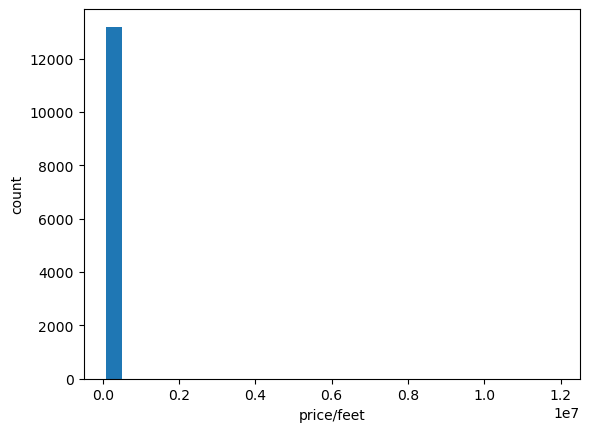

In [50]:
plt.hist(df.price_per_sqft,bins =20,rwidth = 0.7)
plt.xlabel('price/feet')
plt.ylabel('count')
plt.show()

In [15]:
df.price_per_sqft.quantile(0.01)

2549.0

In [17]:
df.price_per_sqft.quantile(0.001)

1366.184

In [19]:
df.price_per_sqft.quantile(0.0001)

385.3955

In [21]:
df.price_per_sqft.quantile(0.99)

23674.45000000001

In [23]:
df.price_per_sqft.quantile(0.999)

50959.36200000098

In [25]:
min_threshold ,max_threshold= df.price_per_sqft.quantile([0.001,0.999])
print(min_threshold,"|",max_threshold)

1366.184 | 50959.36200000098


In [27]:
df.shape

(13200, 7)

In [31]:
df1 = df[(df.price_per_sqft > min_threshold)&(df.price_per_sqft < max_threshold)]
df1.shape

(13172, 7)

## 4 STD DEV

In [42]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [44]:
upper_limit = df1.price_per_sqft.mean() + 4*df1.price_per_sqft.std()
upper_limit

23227.73653589429

In [46]:
lower_limit = df1.price_per_sqft.mean() - 4*df1.price_per_sqft.std()
lower_limit

-9900.429065502549

In [48]:
df2 = df1[(df1.price_per_sqft > lower_limit)&(df1.price_per_sqft < upper_limit)]
df2.shape

(13047, 7)

In [54]:
df2.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

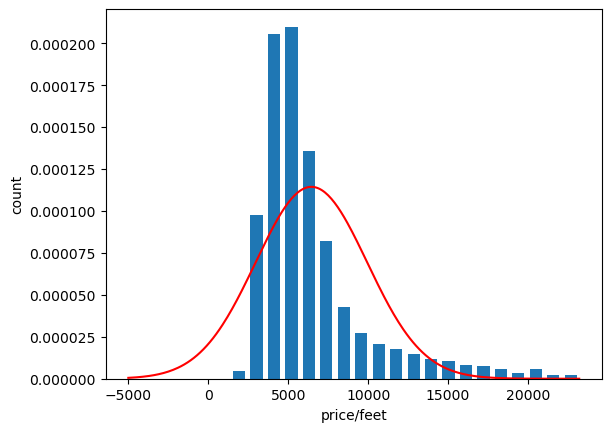

In [69]:
plt.hist(df2.price_per_sqft,bins =20,rwidth = 0.7,density = True)
plt.xlabel('price/feet')
plt.ylabel('count')
rng = np.arange(-5000,df2.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()),color = 'red')
plt.show()

## ZSCORE

In [61]:
df2.shape

(13047, 7)

In [65]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df.price_per_sqft.std()
df2

C:\Users\AJU\AppData\Local\Temp\ipykernel_10656\1708263430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.025770
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.017187
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.020092
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.001914
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.020607
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.002246
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.043678
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.011162
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.037082


In [67]:
df3 = df2[(df2.zscore > -4)&(df2.zscore < 4)]
df3.shape

(13047, 8)

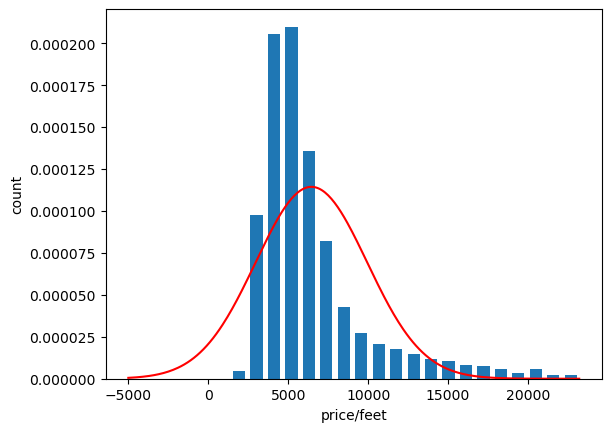

In [71]:
plt.hist(df3.price_per_sqft,bins =20,rwidth = 0.7,density = True)
plt.xlabel('price/feet')
plt.ylabel('count')
rng = np.arange(-5000,df3.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()),color = 'red')
plt.show()